# predicting breast cancer
### predicting breast cancer using sigmoid in logistic regression


### Hypothesis
The model is expeted to predict values between 0 and 1 where 0 is benign and 1 is malignant

### importing modules

* pandas
* numpy
* matplotlib

reading "cancer.data" data using pandas module 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# reading "cancer.data" data using pandas module 
df_cancer = pd.read_csv("cancer.data", header=None)

### Observing DataFrame
using
* .head()
* .info()
* .isnull()
* .value_counts()

In [2]:
df_cancer.head(2)

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2


In [3]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
0     699 non-null int64
1     699 non-null int64
2     699 non-null int64
3     699 non-null int64
4     699 non-null int64
5     699 non-null int64
6     699 non-null object
7     699 non-null int64
8     699 non-null int64
9     699 non-null int64
10    699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [4]:
df_cancer.describe()

,0,1,2,3,4,5,7,8,9,10
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [5]:
df_cancer[6].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: 6, dtype: int64

In [6]:
df_cancer[df_cancer.isnull()].count()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

looking at the dataframe head, the colomns seem to have interger values but the dataframe info says that all columns are interger except for column 6, which is object, the descriptive table doesn't show column 6,so from there i looked into column 6 where i found that there are unusual values.The data frame has no NaN values 

### Handle unusual values

* Replacing unusual values with np.Nan
* Imputing the np.Nan values with the mode value
* checking for missing values

In [7]:
df_cancer = df_cancer.replace('?',np.NaN)

In [8]:
for col in df_cancer:
    # Check if the column is of object type
    if df_cancer[col].dtypes == 'object':
        # Impute with the most frequent value
        df_cancer = df_cancer.fillna(df_cancer[col].value_counts().index[0])
        
# Count the number of NaNs in the dataset and print the counts to verify
df_cancer[df_cancer.isnull()].count().sum()


0

### transforming
converting none numeric values to numeric values using LabelEncoder

In [9]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in df_cancer:
    # Compare if the dtype is object
    if df_cancer[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        df_cancer[col]=le.fit_transform(df_cancer[col])

### Renaming columns

In [10]:
df_cancer.rename(columns={0:'Sample_code_number',1:"Clump_Thickness",2:"Uniformity_of_Cell_Size",3:"Uniformity_of_Cell_Shape",
4:"Marginal_Adhesion",
5:"Single_Epithelial_Cell_Size", 6:"Bare_Nuclei",
7:"Bland_Chromatin", 8:"Normal_Nucleoli", 9:"Mitoses",10:"Class"}, inplace=True)


### Exploring Data

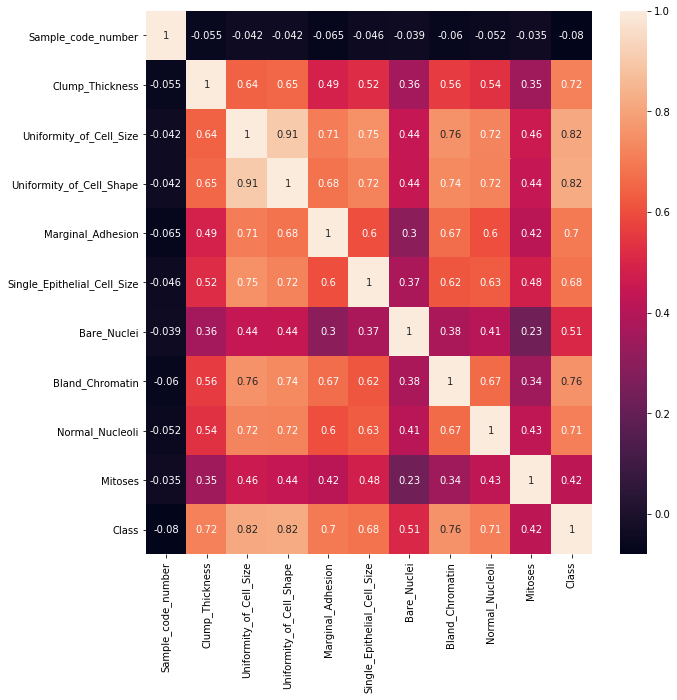

In [11]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df_cancer.corr(), annot=True)
plt.show()

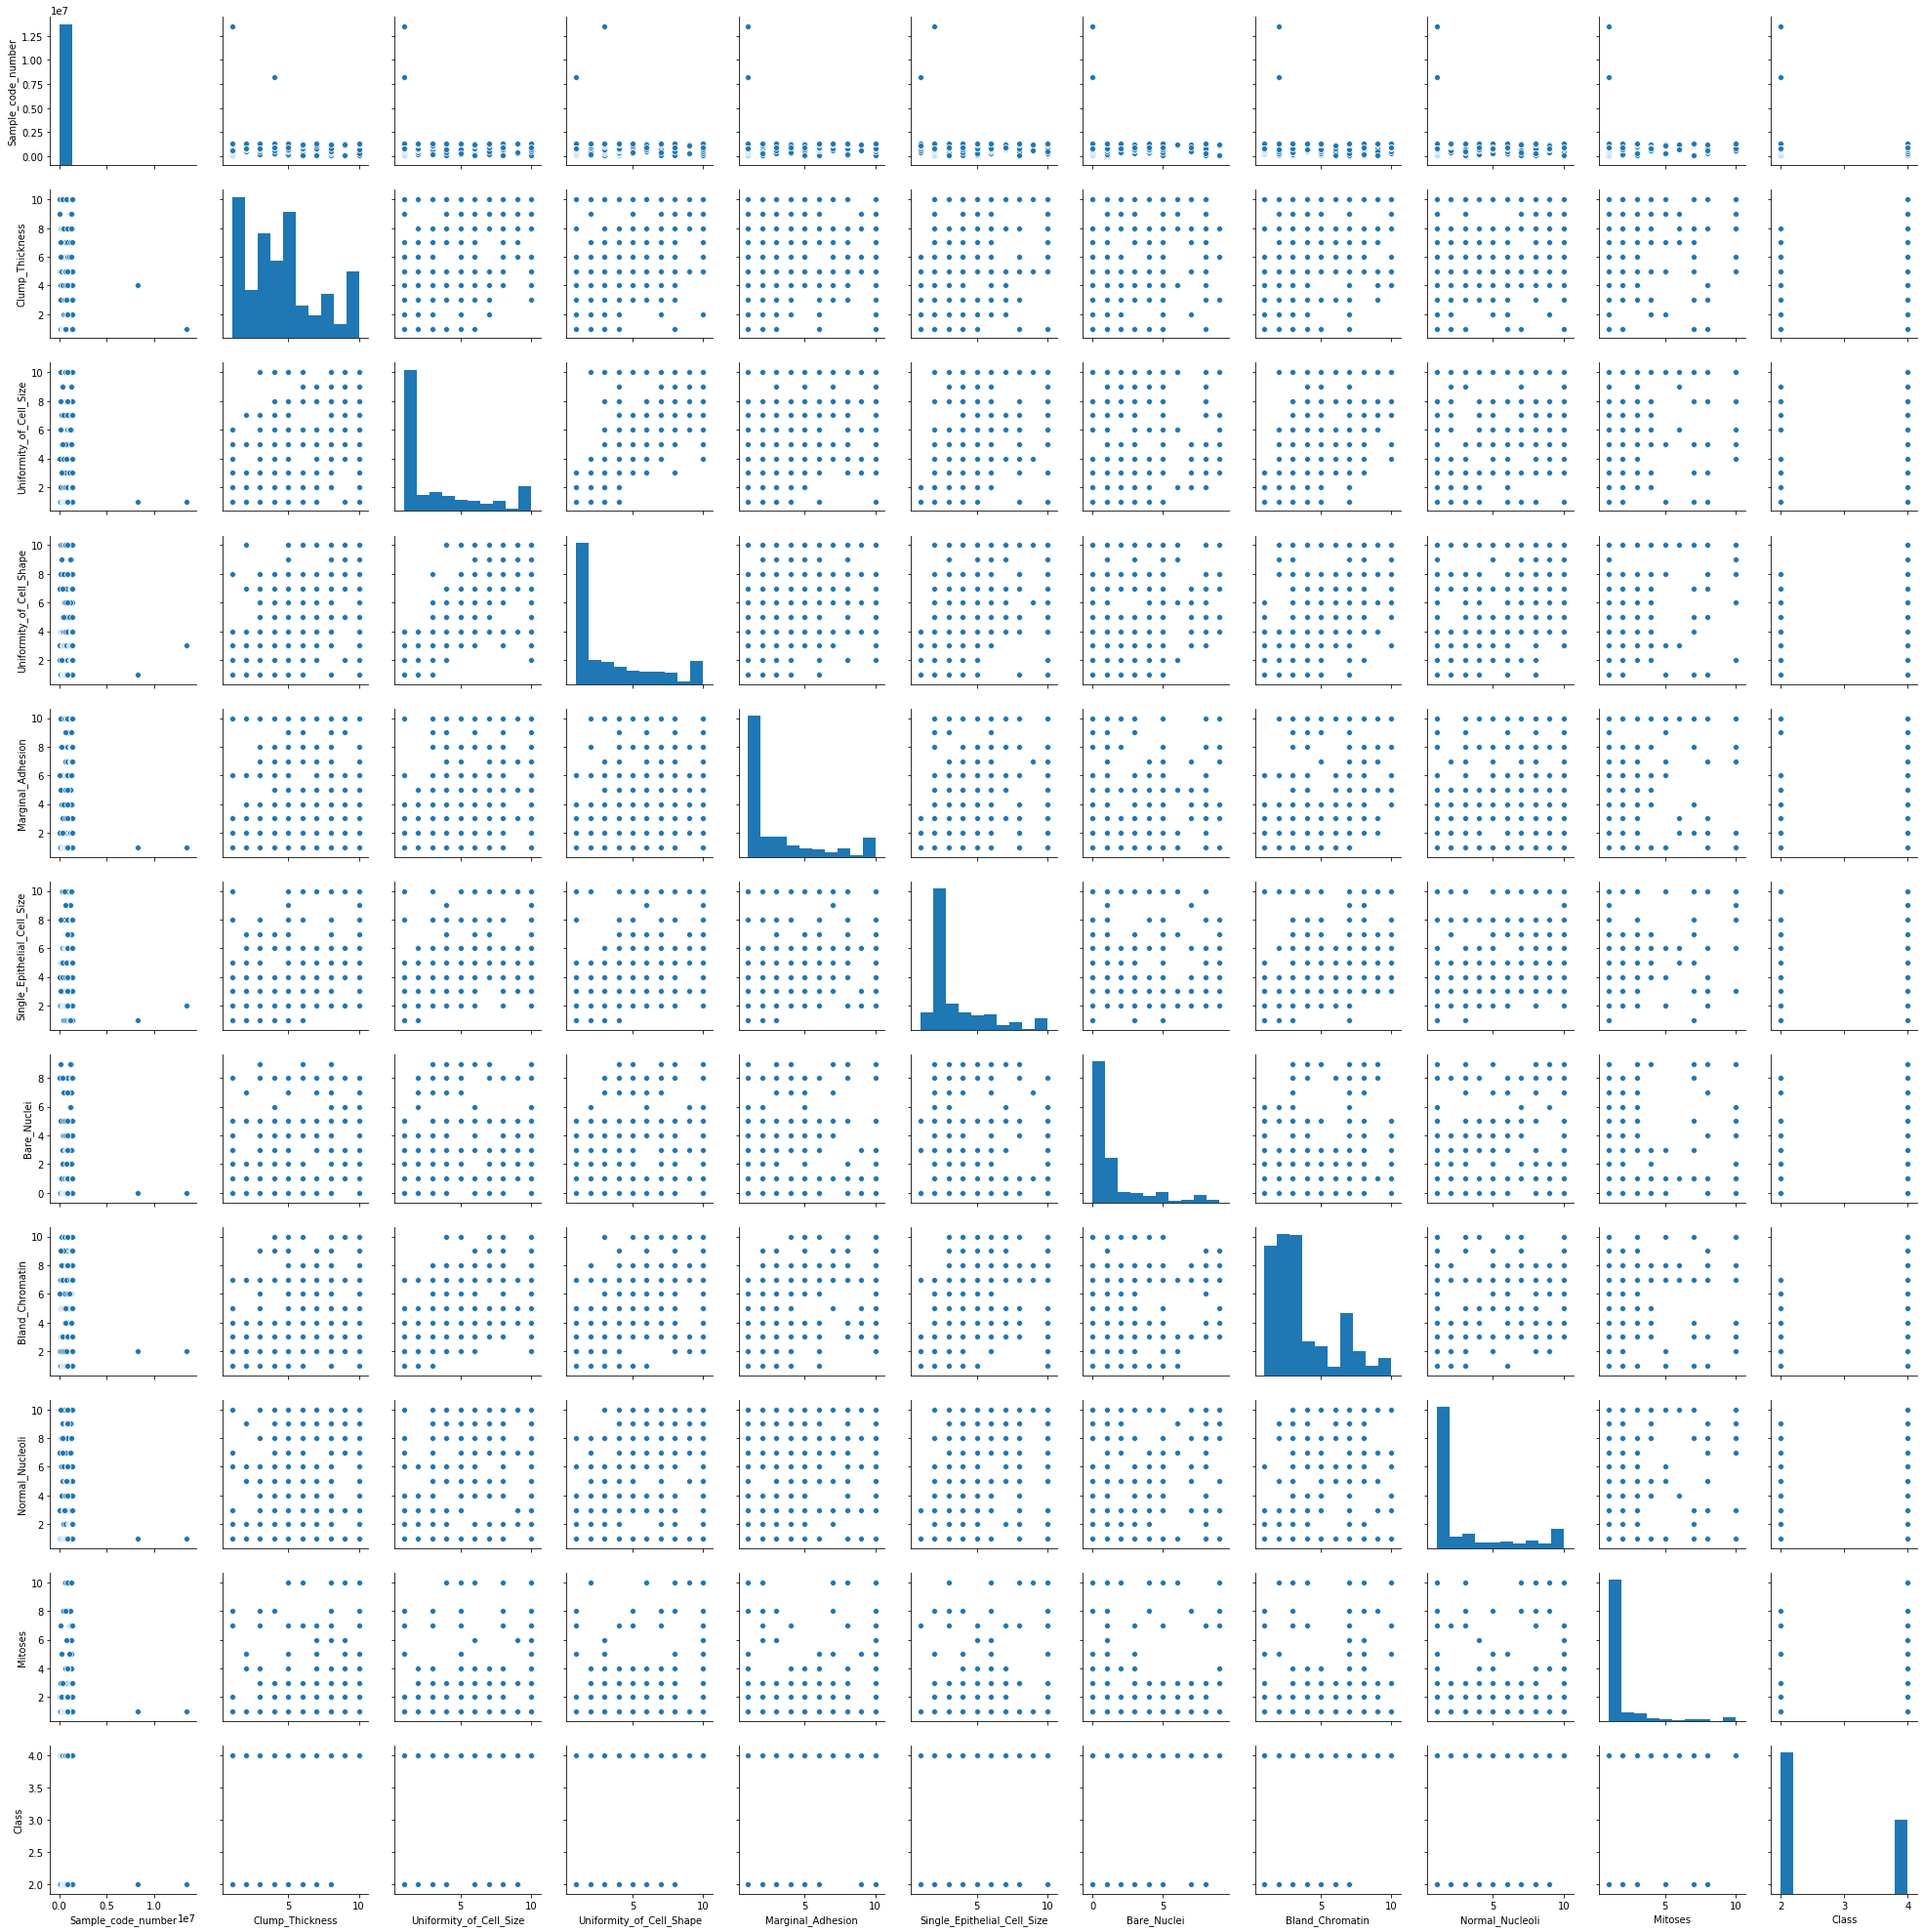

In [12]:
sns.pairplot(df_cancer)
plt.show()

### splitting data
* Converting DataFrame to Numpy array
* Segregate features and labels into separate variables
* Using sklearn.model_selection 'train_test_split'
* Scaling splitted data 'X_train and X_test'

In [13]:
types={
    2:0,
    4:1
}
df_cancer['Class'] = df_cancer['Class'].map(types)

In [14]:
df_cancer.head()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,0,3,1,1,0
1,1002945,5,4,4,5,7,1,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,0,3,1,1,0


In [15]:
from sklearn.model_selection import train_test_split
# df_cancer = df_cancer.values
X = df_cancer.iloc[:,1:9] 
y = df_cancer.iloc[:,10]
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.33,
                                random_state=42)

In [16]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

### Creating model using sklearn.linear_model "LogisticRegression"

In [17]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression(random_state=0)

# Fit logreg to the train set
model = logreg.fit(rescaledX_train, y_train)
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
from sklearn.feature_selection import RFE
selector = RFE(model, n_features_to_select =1)
selector = selector.fit(rescaledX_train, y_train)
order = selector.ranking_

In [19]:
feature_ranks = []
for i in order:
    feature_ranks.append(f"{i}. {df_cancer.columns[i]}")
feature_ranks

['4. Marginal_Adhesion',
 '2. Uniformity_of_Cell_Size',
 '1. Clump_Thickness',
 '6. Bare_Nuclei',
 '8. Normal_Nucleoli',
 '5. Single_Epithelial_Cell_Size',
 '3. Uniformity_of_Cell_Shape',
 '7. Bland_Chromatin']

In [20]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_testpred = logreg.predict(rescaledX_test)
y_trainpred =logreg.predict(rescaledX_train)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test,y_test))

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test, y_testpred))
print('/n')

Accuracy of logistic regression classifier:  0.9696969696969697
[[151   3]
 [  4  73]]
/n


In [21]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100,150,200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

In [22]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator = logreg, param_grid = param_grid, cv = 5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.959943 using {'max_iter': 100, 'tol': 0.01}


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_testpred))
print('/n')
print(classification_report(y_train,y_trainpred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       154
           1       0.96      0.95      0.95        77

    accuracy                           0.97       231
   macro avg       0.97      0.96      0.97       231
weighted avg       0.97      0.97      0.97       231

/n
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       304
           1       0.95      0.95      0.95       164

    accuracy                           0.96       468
   macro avg       0.96      0.96      0.96       468
weighted avg       0.96      0.96      0.96       468



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.983


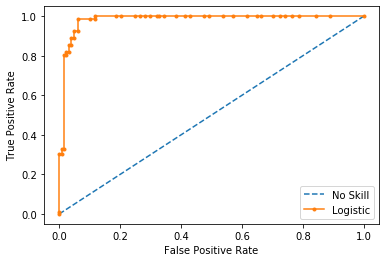

In [24]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
X, y = df_cancer.iloc[:,1:9] , df_cancer.iloc[:,10]
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=32)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
